1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

Given these scatter plots, the three features are uncorrelated (one could further compute the correlation and check the consistency with 0)


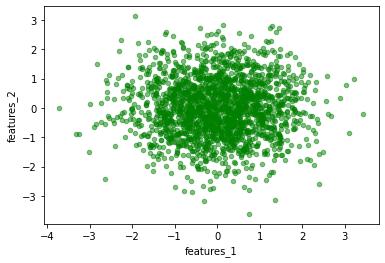

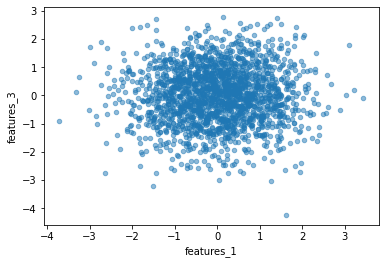

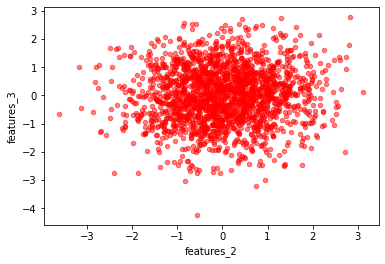

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('regression_generated.csv')
file.plot.scatter(x = 'features_1', y = 'features_2', alpha = 0.5, c = 'g')
file.plot.scatter(x = 'features_1', y = 'features_3', alpha = 0.5,)
file.plot.scatter(x = 'features_2', y = 'features_3', alpha = 0.5, c = 'r')
print("Given these scatter plots, the three features are uncorrelated (one could further compute the correlation and check the consistency with 0)")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

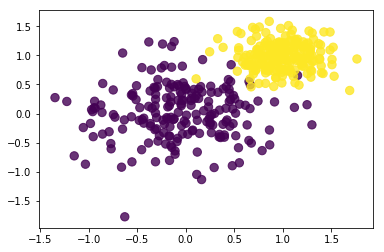

In [4]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

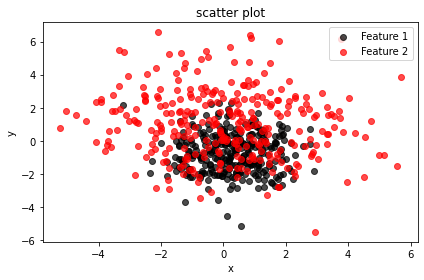

In [16]:
def gen_2d(mean_dist, covariance_matrix, n): #define the function
    g_1 = np.random.multivariate_normal(mean_dist[0], covariance_matrix[0], n) 
    g_2 = np.random.multivariate_normal(mean_dist[1], covariance_matrix[1], n)
    return g_1, g_2

g_1, g_2 = gen_2d(([0.2, -0.7], [0, 1]), ([[1, 0], [0, 1.5]], [[4, 0], [0, 4]]), 300) #create the set with some values
data_1 = pd.DataFrame(g_1, columns = ["x", "y"])
data_2 = pd.DataFrame(g_2, columns = ["x", "y"])

ax = plt.figure().add_subplot(111) #plot the data
ax.set_title("scatter plot") 
ax.scatter(x = "x", y = "y", c = "black", data = data_1, marker = "o", alpha = 0.7, label = "Feature 1")
ax.scatter(x = "x", y = "y", c = "red", data = data_2, marker = "o", alpha = 0.7, label = "Feature 2")
ax.legend(loc = "upper right")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.tight_layout()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Data
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns] 

Data with residuals <2
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns] 



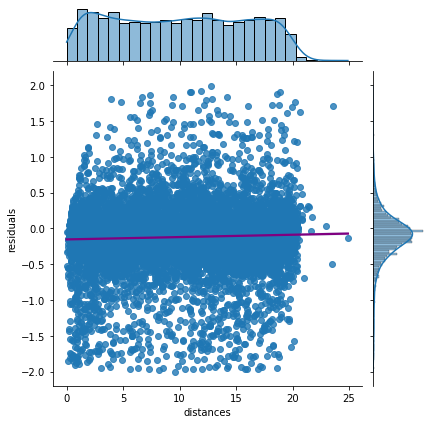

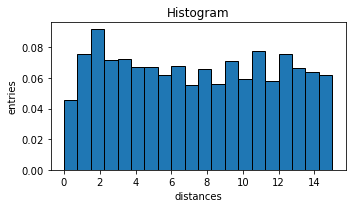

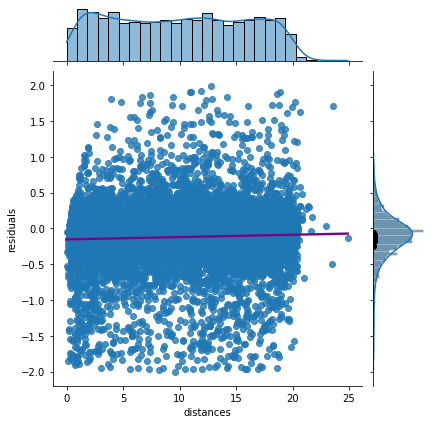

In [77]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

read = open('data/residuals_261.pkl', 'rb')
pkl_file = pickle.load(read)
read.close()

#create the dataframe
pkl_df = pd.DataFrame.from_dict(pkl_file.flatten()[0], orient='columns') #flatten to 1 dim, whose 0 element is a dictionary
print('Data\n', pkl_df, '\n')

selected_data = pkl_df[abs(pkl_df['residuals']) < 2]
print('Data with residuals <2\n', selected_data, '\n')

p = sns.jointplot(y = selected_data['residuals'], x = selected_data['distances'], kind="reg")
regline = p.ax_joint.get_lines()[0]
regline.set_color('purple')

fig = plt.figure(figsize=(5, 3)) #histogram plot
h, bins, _ = plt.hist(selected_data['distances'], bins=20, range=(0, 15), density=True, edgecolor = 'black', cumulative=False) 
ax = fig.axes[0]
ax.set_title('Histogram')
ax.set_xlabel('distances')
ax.set_ylabel('entries')
fig.tight_layout()

#create the arrays
x = (bins[1:] + bins[:-1]) / 2

y = []
for i in range(len(bins)-1):
    yi = selected_data[(selected_data['distances'] >= bins[i]) & (selected_data['distances'] <= bins[i+1])]['residuals'].mean()
    y.append(yi)
y = np.array(y)

err_y = []
for i in range(len(bins)-1):
    err_yi = selected_data[(selected_data['distances'] >= bins[i]) & (selected_data['distances'] <= bins[i+1])]['residuals'].std()
    err_y.append(err_yi)
err_y = np.array(err_y)

    
k = sns.jointplot(x="distances", y="residuals", data = selected_data, kind="reg")
plt.errorbar(x=x, y=y, ecolor="r", fmt="ko")
regline = k.ax_joint.get_lines()[0]
regline.set_color('purple')
plt.show()



4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


ValueError: 'x' and 'y' must have the same size

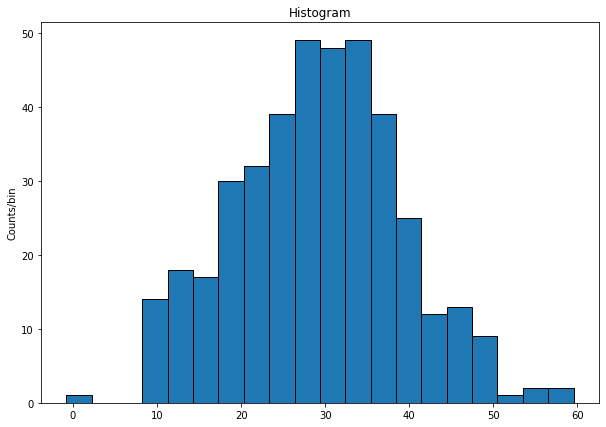

In [85]:
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy as sp

x = npr.normal(30, 10, 400)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(x, bins = 20, edgecolor = "black")
ax.set_title("Histogram")
ax.set_ylabel("Counts/bin")
poisson_er = np.sqrt(bins)
centers = (bins[:-1] + bins[1:])/2
ax.errorbar(centers, bins, yerr = poisson_er, fmt = 'none', c = 'purple')
 #incompleto... non riesco a centrare gli errori e a plottarli